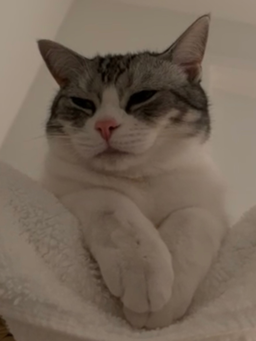

In [ ]:
import PIL, torch, torchvision

to_tensor = torchvision.transforms.ToTensor()

img_raw = PIL.Image.open('Bierbier2.jpg')
new_width = 256
new_height = int(img_raw.height * new_width / img_raw.width)

img_raw = img_raw.resize((new_width, new_height))
img_raw

In [ ]:
img = to_tensor(img_raw)
img = img.unsqueeze(0)
img = 0.5 + 0.5 * (img - img.mean()) / img.std()
img

tensor([[[[ 1.4479,  1.4479,  1.4479,  ...,  1.3250,  1.3250,  1.3250],
          [ 1.4479,  1.4479,  1.4479,  ...,  1.3250,  1.3250,  1.3250],
          [ 1.4479,  1.4479,  1.4479,  ...,  1.3250,  1.3250,  1.3250],
          ...,
          [-0.0884, -0.1345, -0.1806,  ...,  1.2175,  1.2482,  1.2943],
          [-0.1191, -0.1345, -0.1191,  ...,  1.1868,  1.2329,  1.2789],
          [-0.1652, -0.1191, -0.0884,  ...,  1.1714,  1.1868,  1.2329]],

         [[ 1.2636,  1.2636,  1.2636,  ...,  1.0792,  1.0792,  1.0792],
          [ 1.2636,  1.2636,  1.2636,  ...,  1.0792,  1.0792,  1.0792],
          [ 1.2636,  1.2636,  1.2636,  ...,  1.0792,  1.0792,  1.0792],
          ...,
          [-0.4264, -0.4725, -0.5186,  ...,  0.9256,  0.9563,  1.0024],
          [-0.4417, -0.4725, -0.4571,  ...,  0.8949,  0.9410,  0.9870],
          [-0.4878, -0.4417, -0.4264,  ...,  0.8795,  0.8949,  0.9410]],

         [[ 1.0178,  1.0178,  1.0178,  ...,  0.8795,  0.8641,  0.8488],
          [ 1.0178,  1.0178,  

In [ ]:
alexnet = torchvision.models.alexnet(weights = 'IMAGENET1K_V1')
alexnet.eval()

output = alexnet(img)
output.size()

torch.Size([1, 1000])

In [ ]:
scores, indexes = output.view(-1).sort(descending = True)

class_names = eval(open('imagenet1000_clsid_to_human.txt', 'r').read())

for k in range(12):
    print(f'#{k+1} {scores[k].item():02f} {class_names[indexes[k].item()]}')

#1 12.905361 Egyptian cat
#2 10.280477 tabby, tabby cat
#3 10.266644 lynx, catamount
#4 10.092794 tiger cat
#5 8.870489 plastic bag
#6 8.232848 washbasin, handbasin, washbowl, lavabo, wash-hand basin
#7 8.219509 Persian cat
#8 8.078362 paper towel
#9 7.894816 toilet tissue, toilet paper, bathroom tissue
#10 7.871633 tub, vat
#11 7.555393 Angora, Angora rabbit
#12 7.362782 toilet seat
